<a href="https://colab.research.google.com/github/duchaba/Data-Augmentation-with-Python/blob/main/data_augmentation_with_python_chapter_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Augmentation with Python, Chapter 5

# 🌻 Welcome to Chapter 4, "Image Augmentation for Segmentation"

In this chapter, you will learn about Text augmentation and how to code the methods in Python. In particular, the topics are as follows: 

- Character augmenting 

- Word augmenting 

- Sentence and flow augmenting 

- Text augmentation libraries 

- Reinforce learning through Python code 

## Set up: Bring back Pluto


### ✋ STOP: Pull Method

- There are two methods to bring back Pluto.

1. Clone from GitHut (or update by doing "git pull if you have clone it before)

2. Or retrieve from an URL. The URL can be the GitHub URL or an URL the you store your Pluto python file from the first lesson.

- Do one, but not both.

### GitHub Clone

In [1]:
# git version should be 2.17.1 or higher
!git --version

git version 2.17.1


In [2]:
#url = 'https://github.com/PacktPublishing/Data-Augmentation-with-Python'
url = 'https://github.com/duchaba/Data-Augmentation-with-Python'
!git clone {url}

Cloning into 'Data-Augmentation-with-Python'...
remote: Enumerating objects: 164, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 164 (delta 11), reused 26 (delta 10), pack-reused 106
Receiving objects: 100% (164/164), 257.42 MiB | 25.63 MiB/s, done.
Resolving deltas: 100% (60/60), done.


### Fetch file from URL (Optional)

- Uncommend the below 2 code cells if you want to use URL and not Git Clone

In [3]:
# import requests
# #
# def fetch_file(url, dst):
#   downloaded_obj = requests.get(url)
#   with open(dst, "wb") as file:
#     file.write(downloaded_obj.content)
#   return

In [4]:
# url = ''
# dst = 'pluto_chapter_1.py'
# fetch_file(url,dst)

### Pluto

- Instantiate up Pluto, aka. "Pluto, wake up!"

In [5]:
#load and run the pluto chapter 1 Python code.
pluto_file = 'Data-Augmentation-with-Python/pluto/pluto_chapter_2.py'
%run {pluto_file}

---------------------------- : ----------------------------
            Hello from class : <class '__main__.PacktDataAug'> Class: PacktDataAug
                   Code name : Pluto
                   Author is : Duc Haba
---------------------------- : ----------------------------


- Double check on the server environments

In [6]:
pluto.say_sys_info()

---------------------------- : ----------------------------
                 System time : 2022/10/29 04:01
                    Platform : linux
       Python version (3.7+) : 3.7.15 (default, Oct 12 2022, 19:14:55) 
[GCC 7.5.0]
     PyTorch version (1.11+) : 1.12.1+cu113
     Pandas version (1.3.5+) : 1.3.5
        PIL version (9.0.0+) : 7.1.2
 Matplotlib version (3.2.2+) : 3.2.2
                   CPU count : 2
                  *CPU speed : NOT available
---------------------------- : ----------------------------


### ✋ STOP: Reinitalize Kaggle

- Install the following libraries, and import it on the Notebook.
- Follow by initialize Kaggle username, key and fetch methods.
- STOP: Update your Kaggle access username or key first.

In [7]:
# -------------------- : --------------------
# READ ME
# Chapter 2 begin:
# Install the following libraries, and import it on the Notebook.
# Follow by initialize Kaggle username, key and fetch methods.
# STOP: Update your Kaggle access username or key first.
# -------------------- : --------------------

!pip install opendatasets --upgrade
import opendatasets
print("\nrequired version 0.1.22 or higher: ", opendatasets.__version__)

!pip install pyspellchecker 
import spellchecker
print("\nRequired version 0.7+", spellchecker.__version__)

# STOP: Update your Kaggle access username or key first.
pluto.remember_kaggle_access_keys("duchaba", "0c737c90feacb5c56232b0d7c24e8664")
pluto._write_kaggle_credit()
import kaggle

@add_method(PacktDataAug)
def fetch_kaggle_comp_data(self,cname):
  #self._write_kaggle_credit()  # need to run only once.
  path = pathlib.Path(cname)
  kaggle.api.competition_download_cli(str(path))
  zipfile.ZipFile(f'{path}.zip').extractall(path)
  return

@add_method(PacktDataAug)
def fetch_kaggle_dataset(self,url,dest="kaggle"):
  #self._write_kaggle_credit()    # need to run only once.
  opendatasets.download(url,data_dir=dest)
  return
# -------------------- : --------------------


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

required version 0.1.22 or higher:  0.1.22
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.5 MB 8.4 MB/s 

Required version 0.7+ 0.7.0


# Fetch Kaggle Data

## NetFlix

In [8]:
%%time
url = 'https://www.kaggle.com/datasets/infamouscoder/dataset-netflix-shows'
pluto.fetch_kaggle_dataset(url)

100%|██████████| 1.34M/1.34M [00:00<00:00, 94.7MB/s]


CPU times: user 98.5 ms, sys: 12.1 ms, total: 111 ms
Wall time: 613 ms


In [9]:
f = 'kaggle/dataset-netflix-shows/netflix_titles.csv'
pluto.df_netflix_data = pluto.fetch_df(f)
pluto.df_netflix_data.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [10]:
pluto.print_batch_text(pluto.df_netflix_data)

,title,description
6024,7 (Seven),"Multiple women report their husbands as missing but when it appears they are looking for the same man, a police officer traces their cryptic connection."
1397,A Monster Calls,"Overwhelmed by his mother’s illness, a young boy begins to understand human complexity through the fantastic tales of a consoling tree monster."
7,Sankofa,"On a photo shoot in Ghana, an American model slips back in time, becomes enslaved on a plantation and bears witness to the agony of her ancestral past."
631,The Seven Deadly Sins,"When a kingdom is taken over by tyrants, the deposed princess begins a quest to find a disbanded group of evil knights to help take back her realm."
829,Dog Gone Trouble,The privileged life of a pampered dog named Trouble is turned upside-down when he gets lost and must learn to survive on the big-city streets.
461,The Unknown Saint,"Following a stint behind bars, a thief returns to where he buried his loot, only to find that his hiding spot is now a shrine to an unknown saint."
4954,Om Shanti Om,"Reincarnated 30 years after being killed in a suspicious on-set fire, a small-time actor is determined to punish the person who ignited the blaze."
2786,A Life of Speed: The Juan Manuel Fangio Story,"Juan Manuel Fangio was the Formula One king, winning five world championships in the early 1950s — before protective gear or safety features were used."
2087,Santana,Two brothers — one a narcotics agent and the other a general — finally discover the identity of the drug lord who murdered their parents decades ago.
8300,The First Temptation of Christ,"Jesus, who's hitting the big 3-0, brings a surprise guest to meet the family. A Christmas special so wrong, it must be from comedians Porta dos Fundos."


In [11]:
pluto.count_word(pluto.df_netflix_data)
pluto.df_netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,wordc
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",27
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",27
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,27
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",24
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24


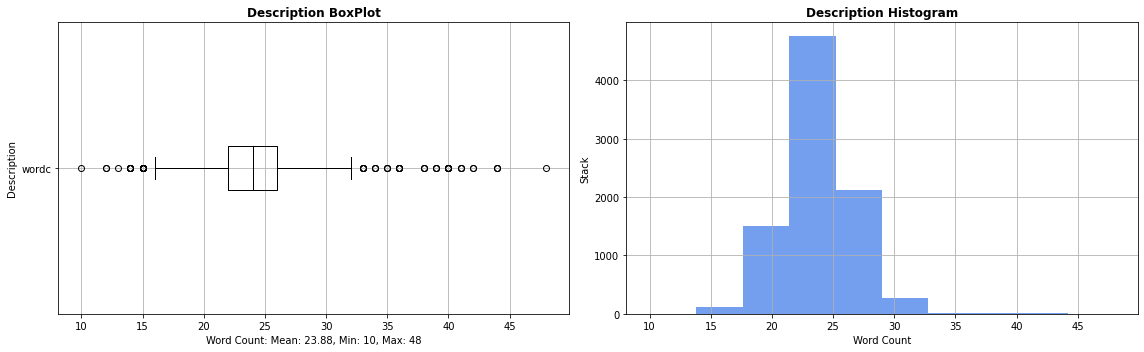

In [12]:
pluto.draw_word_count(pluto.df_netflix_data)

## Twitter

In [13]:
@add_method(PacktDataAug)
def fetch_df(self, csv):
  df = pandas.read_csv(csv, encoding='latin-1')
  return df

In [55]:
# 
%%time
#url = 'https://www.kaggle.com/datasets/datatattle/covid-19-nlp-text-classification'
url = 'https://www.kaggle.com/datasets/mayurdalvi/twitter-sentiments-analysis-nlp'
pluto.fetch_kaggle_dataset(url)

100%|██████████| 1.23M/1.23M [00:00<00:00, 111MB/s]


CPU times: user 82.7 ms, sys: 10.1 ms, total: 92.8 ms
Wall time: 617 ms


In [56]:
# remove white space in directory and filename
# run this until no error/output
f = 'kaggle/twitter-sentiments-analysis-nlp'
#!find {f} -name "* *" -type d | rename 's/ /_/g'
!find {f} -name "* *" -type f | rename 's/ /_/g'

In [57]:
f = 'kaggle/twitter-sentiments-analysis-nlp/Twitter_Sentiments.csv'
pluto.df_twitter_data = pluto.fetch_df(f)
pluto.df_twitter_data.head(3)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty


In [62]:
pluto.print_batch_text(pluto.df_twitter_data,cols=['label', 'tweet'])

,label,tweet
11271,1,"y'all, is global. we just may have to lose before folks understand."
31165,0,my mom and 3rd grandmother #mall #smile
20697,0,let's say it plain and simple: these are two #dogs.
22833,0,the latest japanfuninfo! thanks to @user @user @user #Ã§ÂÂ¹Ã¤ÂºÂ
19621,0,class of sept 2014 came to a fruitful end. #life
16843,0,40th bihday cake #labradors #holland #southafrica #uk #bihday #cake #baking
11904,0,@user @user but you never talk with me
9540,0,when the most exciting season so far in the league is going to end tomorrow.
21537,0,i figured out why lower income groups don't read as much as higher income groups: creditable #books cost more than rent! #economic
27838,0,"google censoring free speech! gateway pundit, pamela geller, who else has been censored and who's next?"


In [28]:
!pip install filter-profanity
import profanity

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 46 kB 2.5 MB/s 


In [75]:
# clean up
import re
#
@add_method(PacktDataAug)
def _clean_text(self,x):
  return (re.sub('[^A-Za-z0-9 .,!?#@]+', '', str(x)))
#
@add_method(PacktDataAug)
def _clean_bad_word(self,x):
  return (profanity.censor_profanity(x, ''))
#
@add_method(PacktDataAug)
def clean_text(self, df):
  df['clean_tweet'] = df.tweet.apply(self._clean_text)
  df['clean_tweet'] = df['clean_tweet'].apply(self._clean_bad_word)
  #df['clean_tweet'] = df.tweet.apply(self._clean_bad_word)
  return df

In [76]:
%%time
pluto.clean_text(pluto.df_twitter_data)
pluto.df_twitter_data.head()

CPU times: user 3.24 s, sys: 21 ms, total: 3.26 s
Wall time: 3.26 s


,id,label,tweet,clean_tweet,clean_tweet_2
0,1,0,@user when a father is dysfunctional and is s...,@user when a father is dysfunctional and is so...,@user when a father is dysfunctional and is so...
1,2,0,@user @user thanks for #lyft credit i can't us...,@user @user thanks for #lyft credit i cant use...,@user @user thanks for #lyft credit i cant use...
2,3,0,bihday your majesty,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur!!!,#model i love u take with u all the time in ur!!!
4,5,0,factsguide: society now #motivation,factsguide society now #motivation,factsguide society now #motivation


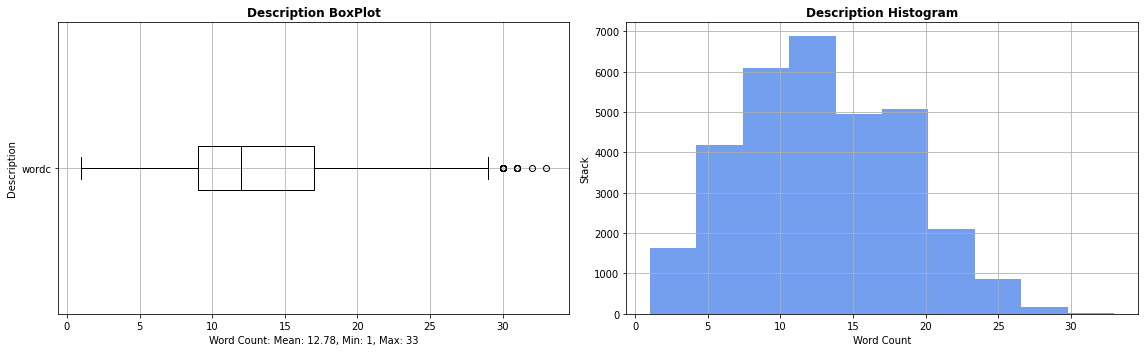

In [77]:
pluto.count_word(pluto.df_twitter_data,col_dest='clean_tweet')
pluto.draw_word_count(pluto.df_twitter_data)

In [23]:
# !pip install gensim==4.2.0

In [ ]:
# import os
# os.environ["MODEL_DIR"] = '../model'

In [ ]:
# import re
# text = '<seg><html>cat <b>in</b> <cat> <at>the</cat> hat</html></seg>'
# t = re.sub('<[^<]+?>', '', text)
# print(t)

# Character Augmenter<a class="anchor" id="chara_aug">

Augmenting data in character level. Possible scenarios include image to text and chatbot. During recognizing text from image, we need to optical character recognition (OCR) model to achieve it but OCR introduces some errors such as recognizing "o" and "0". `OCRAug` simulate these errors to perform the data augmentation. For chatbot, we still have typo even though most of application comes with word correction. Therefore, `KeyboardAug` is introduced to simulate this kind of errors.

In [24]:
!pip install nlpaug

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 410 kB 5.5 MB/s 


In [37]:
import nlpaug
print('version 1.1.11, actual: ',nlpaug.__version__)

version 1.1.11, actual:  1.1.11


In [38]:
pluto.orig_text = 'It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.'

In [73]:
# %%writefile -a {pluto_chapter_2}

@add_method(PacktDataAug)
def _print_aug_batch(self, df, aug_func, col_dest="description",bsize=3, aug_name='Augmented'):
  col_name = [aug_name, 'Original']
  aug = aug_func.augment(self.orig_text, n=1)
  data = [[aug[0], self.orig_text]]
  df_aug = pandas.DataFrame(data, columns=col_name)
  orig = df[col_dest].sample(bsize)
  for tx in orig:
    aug = aug_func.augment(tx, n=1)
    data = [[aug[0], tx]]
    t = pandas.DataFrame(data, columns=col_name)
    df_aug = df_aug.append(t, ignore_index=True)
  #
  with pandas.option_context("display.max_colwidth", None):
    display(df_aug.head(bsize+1))
  return

## OCR augmenting

In [74]:
# %%writefile -a {pluto_chapter_5}

@add_method(PacktDataAug)
def print_aug_ocr(self, df, col_dest="description",bsize=3, aug_name='Augmented'):
  aug_func = nlpaug.augmenter.char.OcrAug()
  self._print_aug_batch(df, aug_func,col_dest=col_dest,bsize=bsize, aug_name=aug_name)
  return

In [81]:
pluto.print_aug_ocr(pluto.df_netflix_data, col_dest='description',aug_name='OCR Augment')

,OCR Augment,Original
0,It was the best uf times. It wa8 the worst of times. 1t wa8 the age of wi8dum. It was the a9e of foolishness. It was the ep0ch of belief. It was the epoch of incredulity.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,"When hek son i8 kidnapped and later f0ond traumatized, a lawyer takes justice int0 hek own hands, causing events that 8pira1 out of control.","When her son is kidnapped and later found traumatized, a lawyer takes justice into her own hands, causing events that spiral out of control."
2,"When a power fai1oke throws their 8ubuk6an town into chau8, Matthew and hi8 wife stoop to de8pekate measures to secure medicati0n for their child.","When a power failure throws their suburban town into chaos, Matthew and his wife stoop to desperate measures to secure medication for their child."
3,"A team uf mercenaries w0kring with the CIA accepts an off - the - bu0ks mi88i0n in Cheknu6yl, where deadly homan - controlled dkoid8 prepare an ambush.","A team of mercenaries working with the CIA accepts an off-the-books mission in Chernobyl, where deadly human-controlled droids prepare an ambush."


In [77]:
pluto.print_aug_ocr(pluto.df_twitter_data, col_dest='OriginalTweet',aug_name='OCR Augment')

,OCR Augment,Original
0,It wa8 the best of times. 1t was the worst of time8. 1t was the age uf wi8dum. It wa8 the age of foolishness. It was the epoch uf belief. It wa8 the epoch of incredulity.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,"8 GovWike We will like to partner with the state Government tu reach out to many Nigerians in Rivers State in this COVID - lq Era where m0vement8 are ke8tkicted, makret8 and shopping makt8 8hot down. We are a profit company, but will sell and distribute at 2","@GovWike We will like to partner with the state Government to reach out to many Nigerians in Rivers State in this COVID-19 Era where movements are restricted, markets and shopping marts shut down. We are a profit company, but will sell and distribute at 2"
2,Phakmaceotica1 companies maintain theik big profits by exploiting patent laws and prices. # coronavirus,Pharmaceutical companies maintain their big profits by exploiting patent laws and prices.\r\r\n\r\r\n#coronavirus
3,They heard the island of # Oahu is shutting d0wn and wanted to stock up on food! ! 1 donÂ  t blame them # chinavirus # coronavirus # groceries # islandlife # hawaii # hog # pig # hawaiiani81and8 http8: / / t. cu / qdKs8TVUBP,They heard the island of #Oahu is shutting down and wanted to stock up on food !! I donÂt blame them #chinavirus #coronavirus #groceries #islandlife #hawaii #hog #pig #hawaiianislands https://t.co/qdKs8TVUBP


In [25]:
# import nlpaug.augmenter.char as nac
# import nlpaug.augmenter.word as naw
# import nlpaug.augmenter.sentence as nas
# import nlpaug.flow as nafc

# from nlpaug.util import Action

In [26]:
# #text = 'The quick brown fox jumps over the lazy dog .'
# text = 'It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.'
# print(text)

It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.


## Keyboard Augmenter<a class="anchor" id="keyboard_aug"></a>

##### Substitute character by keyboard distance

In [78]:
# %%writefile -a {pluto_chapter_5}

@add_method(PacktDataAug)
def print_aug_keyboard(self, df, col_dest="description",bsize=3, aug_name='Keyboard Augment'):
  aug_func = nlpaug.augmenter.char.KeyboardAug()
  self._print_aug_batch(df, aug_func,col_dest=col_dest,bsize=bsize, aug_name=aug_name)
  return

In [79]:
# aug = nac.KeyboardAug()
# augmented_text = aug.augment(text)
# print("Original:")
# print(text)
# print("Augmented Text:")
# print(augmented_text)

In [83]:
pluto.print_aug_keyboard(pluto.df_netflix_data, col_dest='description',aug_name='Keyboard Augment')

,Keyboard Augment,Original
0,It was the beEG of tUNes. It was the qoTst of gimds. It was the age of wisd*n. It was the age of fIi.ishnews. It was the #pofh of FeliWf. It was the eOocm of ibcred8lutG.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,"A man returns to his childhood hometown, whf3e he Jfets the happily ,ar4iee woman he )nc# jilted, whLIe his bdZt RriFnd endures a more vo:aG&le Jnuon.","A man returns to his childhood hometown, where he meets the happily married woman he once jilted, while his best friend endures a more volatile union."
2,"c5ed zrm*seg and CaGfie BrownW%eOn send up the reAideHtA of Portland, Ore. Typical targets 9ncOIde artisanal light V&lbs and feminist Hkokqtores.","Fred Armisen and Carrie Brownstein send up the residents of Portland, Ore. Typical targets include artisanal light bulbs and feminist bookstores."
3,Cameras foPlPw Tommy Caldwell and Kevin U*rgesob as 6heG take on the ctaRrering challenge of f%#e - climbing Yoaem(he ’ s mLxt firmidSblW rock formation.,Cameras follow Tommy Caldwell and Kevin Jorgeson as they take on the staggering challenge of free-climbing Yosemite’s most formidable rock formation.


In [84]:
pluto.print_aug_keyboard(pluto.df_twitter_data, col_dest='OriginalTweet',aug_name='Keyboard Augment')

,Keyboard Augment,Original
0,It was the beWh of 6im2s. It was the Sorat of t8meE. It was the age of @isdoh. It was the age of Bool7EhneDs. It was the epoSt of bDli#f. It was the 2podh of incrrsuli%g.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,COVID 19 has QreDker the economies of jaBy doungri2s qlr2avy but wklP it do the saHS to the U S Manufacturers are wai57bg to see and as a result s%ee; O3ices remain stable for the time Heinh,COVID 19 has wrecked the economies of many countries already but will it do the same to the U S Manufacturers are waiting to see and as a result steel prices remain stable for the time being
2,"FxjTIN7 ' S # CpVuS19 GAMIHf vXILY WEEKEND UPDATE: One of the most closely watched indicators in gaming, US conw8m4r qentijeBt, plunRwF a record 18. 1 points to 71 in early April, as measured by the University of KiShigWn cpnsumWT sentiment iBdes. .. https: / / t. co / 2PO9gAAJv7","FANTINI'S #COVID19 GAMING DAILY WEEKEND UPDATE: One of the most closely watched indicators in gaming, US consumer sentiment, plunged a record 18.1 points to 71 in early April, as measured by the University of Michigan consumer sentiment index...https://t.co/2PO9gAAJv7"
3,General lockdown aMnounXex in today QiFh reports of panic BooW buying As if that p*Lr sountT^ the only successful Arab Spring cSkocracy ge4ds snottdr blow,General lockdown announced in today with reports of panic food buying As if that poor country the only successful Arab Spring democracy needs another blow


## Random Augmenter<a class="anchor" id="random_aug"></a>

##### Insert character randomly

In [86]:
# %%writefile -a {pluto_chapter_5}

@add_method(PacktDataAug)
def print_aug_char_random(self, df, action='insert', col_dest="description",bsize=3, aug_name='Augment'):
  aug_func = nlpaug.augmenter.char.RandomCharAug(action=action)
  self._print_aug_batch(df, aug_func,col_dest=col_dest,bsize=bsize, aug_name=aug_name)
  return

In [ ]:
# aug = nac.RandomCharAug(action="insert")
# augmented_text = aug.augment(text)
# print("Original:")
# print(text)
# print("Augmented Text:")
# print(augmented_text)

Original:
It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
Augmented Text:
['It was the sbehst of tiHmePs. It was the wxorsct of ti1mdes. It was the age of dwipsdom. It was the age of efooliyshneks7s. It was the *epocvh of 4beliqef. It was the eGpocTh of inycrqedWuli5ty.']


##### Substitute character randomly

In [ ]:
aug = nac.RandomCharAug(action="substitute")
augmented_text = aug.augment(text)
print("Original:")
print(text)
print("Augmented Text:")
print(augmented_text)

Original:
It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
Augmented Text:
['It was the #ewt of tiL@s. It was the Iolst of tiaWs. It was the age of wGsEom. It was the age of (iolkshnesY. It was the pKoch of besikf. It was the epXc9 of ini4P%ulity.']


##### Swap character randomly

In [ ]:
aug = nac.RandomCharAug(action="swap")
augmented_text = aug.augment(text)
print("Original:")
print(text)
print("Augmented Text:")
print(augmented_text)

Original:
It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
Augmented Text:
['It was the esbt of tiesm. It was the owrts of times. It was the age of iwsdmo. It was the age of fooilshnses. It was the epoch of elbief. It was the pecoh of ncierduliyt.']


##### Delete character randomly

In [ ]:
aug = nac.RandomCharAug(action="delete")
augmented_text = aug.augment(text)
print("Original:")
print(text)
print("Augmented Text:")
print(augmented_text)

Original:
It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
Augmented Text:
['It was the es of ims. It was the rst of ies. It was the age of wiso. It was the age of fooihss. It was the eoh of beif. It was the poh of ncrulit.']


# Word Augmenter<a class="anchor" id="word_aug"></a>

Besides character augmentation, word level is important as well. We make use of word2vec (Mikolov et al., 2013), GloVe (Pennington et al., 2014), fasttext (Joulin et al., 2016), BERT(Devlin et al., 2018) and wordnet to insert and substitute similar word. `Word2vecAug`,  `GloVeAug` and `FasttextAug` use word embeddings to find most similar group of words to replace original word. On the other hand, `BertAug` use language models to predict possible target word. `WordNetAug` use statistics way to find the similar group of words.

### Spelling Augmenter<a class="anchor" id="spelling_aug"></a>

##### Substitute word by spelling mistake words dictionary

In [ ]:
aug = naw.SpellingAug()
augmented_texts = aug.augment(text, n=3)
print("Original:")
print(text)
print("Augmented Texts:")
print(augmented_texts)

Original:
It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
Augmented Texts:
['It was the best aof times. Ir was the worst of time. It was tnhe aeg of wisdom. It was tha age og foolishness. It was tha epoch of belief. It ist the epoch iof incredulity.', 'Lt was the best of times. It was the wost of times. IT was the aeg fi wisdow. It was ht ago. aof foolishness. It was the epoch of belief. It was she epoch of incredulity.', 'Lt was th? best lf times. It was the worst off teams. Ir is the age fi wisdom. It was the age of foolishness. It was they epoch of belief. It was the epoch ar incredulity.']


In [ ]:
aug = naw.SpellingAug()
augmented_texts = aug.augment(text, n=3)
print("Original:")
print(text)
print("Augmented Texts:")
print(augmented_texts)

Original:
It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
Augmented Texts:
["It was the best of times. Ir has that worst ol timeas. It was the age of wisdom. It was the age og foolishness. I'ts was the epoch jf belief. It was ther epoch fo incredulity.", 'It was the better OK sessions. It was the worse of times. /It will the age of wisdom. It with the age of foolishness. It was tehere epoch of believe. It was the epoch o incredulity.', "It wa the best of tames. It's wa tu worst lf times. It was thwe age of wisdom. It was the ago of foolishness. It was the epoch os believe. It was the epoch of incredulity."]


### Split Augmenter<a class="anchor" id="split_aug"></a>

##### Split word to two tokens randomly

In [ ]:
aug = naw.SplitAug()
augmented_text = aug.augment(text)
print("Original:")
print(text)
print("Augmented Text:")
print(augmented_text)

Original:
It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
Augmented Text:
['It was the be st of t imes. It was the wo rst of t imes. It was the age of w isdom. It was the age of foo lishness. It was the epo ch of beli ef. It was the ep och of inc redulity.']


### Random Word Augmenter<a class="anchor" id="random_word_aug"></a>

##### Swap word randomly

In [ ]:
# :param str action: 'substitute', 'swap', 'delete' or 'crop'. If value is 'swap'
aug = naw.RandomWordAug(action="swap")
augmented_text = aug.augment(text)
print("Original:")
print(text)
print("Augmented Text:")
print(augmented_text)

Original:
It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
Augmented Text:
['It was the best of times. It was the of worst times. It was the age wisdom. of It was age the of. foolishness was It epoch the of belief. was It the incredulity epoch of.']


##### Delete word randomly

In [ ]:
# aug = naw.RandomWordAug?

In [ ]:
# :param str action: 'substitute', 'swap', 'delete' or 'crop'. If value is 'swap'
aug = naw.RandomWordAug()
augmented_text = aug.augment(text)
print("Original:")
print(text)
print("Augmented Text:")
print(augmented_text)

Original:
It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
Augmented Text:
['It the best of times. It was the of. the of wisdom. It was the age foolishness. the of belief. It was the epoch of incredulity.']


##### Delete a set of contunous word will be removed randomly

In [ ]:
aug = naw.RandomWordAug(action='crop')
augmented_text = aug.augment(text)
print("Original:")
print(text)
print("Augmented Text:")
print(augmented_text)

Original:
It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
Augmented Text:
['It was the best It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.']


### Synonym Augmenter<a class="anchor" id="synonym_aug"></a>

In [33]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

##### Substitute word by WordNet's synonym

In [35]:
text = pluto.df_twitter_data.OriginalTweet[5]
aug = naw.SynonymAug(aug_src='wordnet')
augmented_text = aug.augment(text)
print("Original:")
print(text)
print("Augmented Text:")
print(augmented_text)
# Augmented Text:
# ['It was the good of times. It represent the bad of time. It represent the age of wisdom. It embody the old age of foolishness. It was the epoch of belief. It was the epoch of disbelief.']

Original:
As news of the regionÂs first confirmed COVID-19 case came out of Sullivan County last week, people flocked to area stores to purchase cleaning supplies, hand sanitizer, food, toilet paper and other goods, @Tim_Dodson reports https://t.co/cfXch7a2lU
Augmented Text:
['As news of the regionÂ \x92 s first confirmed COVID - 19 case came out of Sullivan County utmost week, people flock to area stores to purchase cleansing supplies, mitt sanitizer, food for thought, toilet composition and other trade good, @ Tim_Dodson reports https: / / t. co / cfXch7a2lU']


##### Substitute word by PPDB's synonym

In [ ]:
# nltk.download('ppdb-2.0-s-all')

In [ ]:
# aug = naw.SynonymAug(aug_src='ppdb', model_path='ppdb-2.0-s-all')
# augmented_text = aug.augment(text)
# print("Original:")
# print(text)
# print("Augmented Text:")
# print(augmented_text)

### Antonym Augmenter<a class="anchor" id="antonym_aug"></a>

##### Substitute word by antonym

In [ ]:
aug = naw.AntonymAug()
#_text = 'Good boy'
_text = text
augmented_text = aug.augment(_text)
print("Original:")
print(_text)
print("Augmented Text:")
print(augmented_text)

Original:
It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
Augmented Text:
['It differ the worst of times. It differ the unregretful of times. It differ the age of wisdom. It differ the age of foolishness. It differ the epoch of belief. It differ the epoch of incredulity.']


### Word Embeddings Augmenter<a class="anchor" id="word_embs_aug"></a> (advanced)

##### Insert word randomly by word embeddings similarity

In [ ]:
# !ls -la ../model/

In [ ]:
from nlpaug.util.file.download import DownloadUtil

DownloadUtil.download_word2vec(dest_dir='.') # word2vec
DownloadUtil.download_glove(model_name='glove.6B', dest_dir='.') # GloVe
DownloadUtil.download_fasttext(model_name='wiki-news-300d-1M', dest_dir='.') # fasttext model

#
# import nltk
# nltk.download('averaged_perceptron_tagger')
# nltk.download('wordnet')
# nltk.download('punkt')

Downloading...
From: https://drive.google.com/uc?export=download&id=0B7XkCwpI5KDYNlNUTTlSS21pQmM
To: /content/GoogleNews-vectors-negative300.bin.gz
100%|██████████| 1.65G/1.65G [00:09<00:00, 175MB/s]
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Path of the model
gn_vec_path = "GoogleNews-vectors-negative300.bin"
#
# Word Augmenter
import nlpaug.augmenter.word as naw

In [ ]:
# Spelling
aug = naw.SpellingAug()
augmented_text = aug.augment(text)
print("original: ")
print(text)
print("augmented:")
print(augmented_text)

original: 
It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
augmented:
["It was thw best iof times. It was the worst os timens. I'ts was the age fot wisdoms. It was the eage of foolishness. It was the epoch of believe. It wa the epoch of incredulity."]


In [ ]:
# Word embedding
aug = naw.WordEmbsAug(model_type='word2vec', action="insert", model_path=gn_vec_path)
augmented_text = aug.augment(text)
print("original: ")
print(text)
print("augmented:")
print(augmented_text)

original: 
It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
augmented:
['inorganics It MYP was the best of times. It was the sas worst of times. It was the Society age Ituango of wisdom. It Langley was the age Arjowiggins of foolishness. It was the epoch of belief. It was the Physician epoch HOPES of Moskowy incredulity.']


In [ ]:
import gensim
print(gensim.__version__)

4.2.0


In [ ]:
!pip install gensim==4.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.1 MB 1.5 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
model_dir = './'

In [ ]:
# model_type: word2vec, glove or fasttext
aug = naw.WordEmbsAug(
    model_type='word2vec', model_path=model_dir+'GoogleNews-vectors-negative300.bin',
    action="insert")
augmented_text = aug.augment(text)
print("Original:")
print(text)
print("Augmented Text:")
print(augmented_text)

Original:
It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
Augmented Text:
['It was the best of times. It www.sedar.com was minister the worst Sunil of times. Adam It was www.desertstar.biz the age of wisdom. It was the age of foolishness. Volunteer It was CodeSonar the epoch of TEFAF belief. It was superpatriots the epoch SBIG of incredulity.']


##### Substitute word by word2vec similarity

In [ ]:
# model_type: word2vec, glove or fasttext
aug = naw.WordEmbsAug(
    model_type='word2vec', model_path=model_dir+'GoogleNews-vectors-negative300.bin',
    action="substitute")
augmented_text = aug.augment(text)
print("Original:")
print(text)
print("Augmented Text:")
print(augmented_text)

Original:
The quick brown fox jumps over the lazy dog
Augmented Text:
The easy brown fox jumps around the lazy dog


### TF-IDF Augmenter<a class="anchor" id="tfidf_aug"></a> (advanced)

##### Insert word by TF-IDF similarity

In [ ]:
aug = naw.TfIdfAug(
    model_path=os.environ.get("MODEL_DIR"),
    action="insert")
augmented_text = aug.augment(text)
print("Original:")
print(text)
print("Augmented Text:")
print(augmented_text)

FileNotFoundError: ignored

##### Substitute word by TF-IDF similarity

In [ ]:
aug = naw.TfIdfAug(
    model_path=os.environ.get("MODEL_DIR"),
    action="substitute")
augmented_text = aug.augment(text)
print("Original:")
print(text)
print("Augmented Text:")
print(augmented_text)

Original:
The quick brown fox jumps over the lazy dog
Augmented Text:
The quick brown fox Baked over the polygraphy dog


### Contextual Word Embeddings Augmenter<a class="anchor" id="context_word_embs_aug"></a> (advanced)

##### Insert word by contextual word embeddings (BERT, DistilBERT, RoBERTA or XLNet)

In [ ]:
aug = naw.ContextualWordEmbsAug(
    model_path='bert-base-uncased', action="insert")
augmented_text = aug.augment(text)
print("Original:")
print(text)
print("Augmented Text:")
print(augmented_text)

ModuleNotFoundError: ignored

##### Substitute word by contextual word embeddings (BERT, DistilBERT, RoBERTA or XLNet)

In [ ]:
aug = naw.ContextualWordEmbsAug(
    model_path='bert-base-uncased', action="substitute")
augmented_text = aug.augment(text)
print("Original:")
print(text)
print("Augmented Text:")
print(augmented_text)

Original:
The quick brown fox jumps over the lazy dog
Augmented Text:
little quick brown fox jumps over the lazy dog


In [ ]:
aug = naw.ContextualWordEmbsAug(
    model_path='distilbert-base-uncased', action="substitute")
augmented_text = aug.augment(text)
print("Original:")
print(text)
print("Augmented Text:")
print(augmented_text)

Original:
The quick brown fox jumps over the lazy dog .
Augmented Text:
the striped brown fox jumps over the muddy grass .


In [ ]:
aug = naw.ContextualWordEmbsAug(
    model_path='roberta-base', action="substitute")
augmented_text = aug.augment(text)
print("Original:")
print(text)
print("Augmented Text:")
print(augmented_text)

Original:
The quick brown fox jumps over the lazy dog .
Augmented Text:
The quick brown fox jumps Into the bull dog .


### Back Translation Augmenter<a class="anchor" id="back_translation_aug"></a> (advanced)

In [ ]:
import nlpaug.augmenter.word as naw

text = 'The quick brown fox jumped over the lazy dog'
back_translation_aug = naw.BackTranslationAug(
    from_model_name='facebook/wmt19-en-de', 
    to_model_name='facebook/wmt19-de-en'
)
back_translation_aug.augment(text)

ModuleNotFoundError: ignored

In [ ]:
# Load models from local path
import nlpaug.augmenter.word as naw

from_model_dir = os.path.join(os.environ["MODEL_DIR"], 'word', 'fairseq', 'wmt19.en-de')
to_model_dir = os.path.join(os.environ["MODEL_DIR"], 'word', 'fairseq', 'wmt19.de-en')

text = 'The quick brown fox jumped over the lazy dog'
back_translation_aug = naw.BackTranslationAug(
    from_model_name=from_model_dir, from_model_checkpt='model1.pt',
    to_model_name=to_model_dir, to_model_checkpt='model1.pt', 
    is_load_from_github=False)
back_translation_aug.augment(text)


'The speedy brown fox jumped over the lazy dog'

### Reserved Word Augmenter<a class="anchor" id="reserved_aug"></a>

In [ ]:
import nlpaug.augmenter.word as naw

text = 'Fwd: Mail for solution'
reserved_tokens = [
    ['FW', 'Fwd', 'F/W', 'Forward'],
]
reserved_aug = naw.ReservedAug(reserved_tokens=reserved_tokens)
augmented_text = reserved_aug.augment(text)

print("Original:")
print(text)
print("Augmented Text:")
print(augmented_text)

Original:
Fwd: Mail for solution
Augmented Text:
['Forward: Mail for solution']


# Sentence Augmentation (advanced)

### Contextual Word Embeddings for Sentence Augmenter<a class="anchor" id="context_word_embs_sentence_aug"></a> (advanced)

##### Insert sentence by contextual word embeddings (GPT2 or XLNet)

In [ ]:
# model_path: xlnet-base-cased or gpt2
aug = nas.ContextualWordEmbsForSentenceAug(model_path='xlnet-base-cased')
augmented_texts = aug.augment(text, n=3)
print("Original:")
print(text)
print("Augmented Texts:")
print(augmented_texts)

ModuleNotFoundError: ignored

In [ ]:
aug = nas.ContextualWordEmbsForSentenceAug(model_path='gpt2')
augmented_text = aug.augment(text)
print("Original:")
print(text)
print("Augmented Text:")
print(augmented_text)

Original:
The quick brown fox jumps over the lazy dog .
Augmented Text:
The quick brown fox jumps over the lazy dog . J in a Better Balls of Fire cameo on St iring.


In [ ]:
aug = nas.ContextualWordEmbsForSentenceAug(model_path='gpt2')
augmented_text = aug.augment(text)
print("Original:")
print(text)
print("Augmented Text:")
print(augmented_text)

Original:
The quick brown fox jumps over the lazy dog .
Augmented Text:
The quick brown fox jumps over the lazy dog . They start shooting wildly.


In [ ]:
aug = nas.ContextualWordEmbsForSentenceAug(model_path='distilgpt2')
augmented_text = aug.augment(text)
print("Original:")
print(text)
print("Augmented Text:")
print(augmented_text)

Original:
The quick brown fox jumps over the lazy dog .
Augmented Text:
The quick brown fox jumps over the lazy dog . She keeps running around the house.


### Abstractive Summarization Augmenter<a class="anchor" id="abst_summ_aug"></a>

In [ ]:
article = """
The history of natural language processing (NLP) generally started in the 1950s, although work can be 
found from earlier periods. In 1950, Alan Turing published an article titled "Computing Machinery and 
Intelligence" which proposed what is now called the Turing test as a criterion of intelligence. 
The Georgetown experiment in 1954 involved fully automatic translation of more than sixty Russian 
sentences into English. The authors claimed that within three or five years, machine translation would
be a solved problem. However, real progress was much slower, and after the ALPAC report in 1966, 
which found that ten-year-long research had failed to fulfill the expectations, funding for machine 
translation was dramatically reduced. Little further research in machine translation was conducted 
until the late 1980s when the first statistical machine translation systems were developed.
"""

aug = nas.AbstSummAug(model_path='t5-base', num_beam=3)
augmented_text = aug.augment(article)
print("Original:")
print(article)
print("Augmented Text:")
print(augmented_text)

Original:

The history of natural language processing (NLP) generally started in the 1950s, although work can be 
found from earlier periods. In 1950, Alan Turing published an article titled "Computing Machinery and 
Intelligence" which proposed what is now called the Turing test as a criterion of intelligence. 
The Georgetown experiment in 1954 involved fully automatic translation of more than sixty Russian 
sentences into English. The authors claimed that within three or five years, machine translation would
be a solved problem. However, real progress was much slower, and after the ALPAC report in 1966, 
which found that ten-year-long research had failed to fulfill the expectations, funding for machine 
translation was dramatically reduced. Little further research in machine translation was conducted 
until the late 1980s when the first statistical machine translation systems were developed.

Augmented Text:
the history of natural language processing (NLP) generally started in the 19